<center>
<hr>
<h1>Complessità nei sistemi sociali</h1>
<h2>Laurea Magistrale in Fisica Dei Sistemi Complessi</h2>
<h2>A.A. 2020/21</h2>
<h2>Daniela Paolotti & Michele Tizzoni</h2>
<h3>Notebook 7 - Epidemics on networks.</h3>
<hr>
</center>

We use the Python library ["Epidemics on Networks" developed by Kiss, Miller & Simon](https://github.com/springer-math/Mathematics-of-Epidemics-on-Networks).

The library must be installed using pip:

    pip install EoN
  

The library documentation is [available here](http://epidemicsonnetworks.readthedocs.io/en/latest/). 

In [3]:
import EoN
import networkx as nx
import numpy as np
from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Homogeneous network

We simulate the spread of an SIR on an Erdos-Renyi graph with constant recovery rate.

In [7]:
N=10000
p=0.001
G=nx.fast_gnp_random_graph(N, p)

In [8]:
nx.is_connected(G)

True

In [9]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 49949
Average degree:   9.9898


---
# The epidemic threshold for this network can be approximated as $\lambda_c = \frac{\mu}{\langle k \rangle}$

In [10]:
mu=0.2

In [11]:
avg_deg1=2*len(G.edges)/N
lc=mu/avg_deg1
print(lc)

0.02002042082924583


# As expected for this network, we have $\langle k^2 \rangle \sim \langle k \rangle^2 + \langle k \rangle$

In [12]:
sum_k2=0
for i in G.nodes():
    
    k=G.degree(i)
    sum_k2+=k*k

avg_k2=sum_k2/N
print(avg_k2)

109.7682


In [13]:
avg_deg1**2 + avg_deg1

109.78590404000002

## Simulations of an SIR process
We simulate 20 realizations of a SIR model for increasing values of $\lambda$ using the [fast_SIR function of EoN](https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.fast_SIR.html?highlight=fast_SIR)

In [14]:
final_size=defaultdict(list)

for lambd in np.geomspace(0.0001, 1.0, 20):
    
    for r in range(0, 20):
        
        t, S, I, R = EoN.fast_SIR(G, lambd, mu, rho=0.05)
        
        final_size[lambd].append(R[-1]/N)

In [15]:
homo_net_size=pd.DataFrame.from_dict(final_size)

In [18]:
homo_net_size

,0.000100,0.000162,0.000264,0.000428,0.000695,0.001129,0.001833,0.002976,0.004833,0.007848,0.012743,0.020691,0.033598,0.054556,0.088587,0.143845,0.233572,0.379269,0.615848,1.000000
0,0.0504,0.0502,0.0503,0.0508,0.0515,0.0518,0.0547,0.0595,0.0613,0.0773,0.1068,0.2598,0.6004,0.8320,0.9466,0.9866,0.9952,0.9981,0.9998,0.9998
1,0.0501,0.0502,0.0511,0.0507,0.0525,0.0533,0.0543,0.0600,0.0623,0.0826,0.1070,0.2331,0.6024,0.8502,0.9465,0.9865,0.9952,0.9983,0.9993,0.9998
2,0.0504,0.0504,0.0512,0.0509,0.0518,0.0532,0.0542,0.0582,0.0611,0.0762,0.1049,0.2363,0.6144,0.8379,0.9489,0.9854,0.9950,0.9988,0.9992,0.9995
3,0.0501,0.0505,0.0509,0.0512,0.0520,0.0527,0.0553,0.0586,0.0651,0.0739,0.1126,0.2395,0.6008,0.8435,0.9486,0.9812,0.9951,0.9985,0.9994,0.9999
4,0.0502,0.0502,0.0503,0.0513,0.0513,0.0526,0.0548,0.0577,0.0618,0.0802,0.1049,0.2557,0.5968,0.8266,0.9500,0.9846,0.9956,0.9987,0.9995,0.9998
5,0.0501,0.0504,0.0501,0.0509,0.0514,0.0527,0.0549,0.0562,0.0622,0.0824,0.1198,0.2244,0.6049,0.8562,0.9455,0.9857,0.9958,0.9989,0.9989,0.9998
6,0.0503,0.0506,0.0507,0.0510,0.0512,0.0526,0.0550,0.0582,0.0665,0.0782,0.1068,0.2163,0.5699,0.8522,0.9449,0.9851,0.9953,0.9981,0.9995,0.9997
7,0.0502,0.0503,0.0503,0.0507,0.0510,0.0527,0.0536,0.0584,0.0619,0.0750,0.1088,0.2558,0.6262,0.8450,0.9502,0.9865,0.9953,0.9981,0.9996,0.9997
8,0.0503,0.0506,0.0505,0.0508,0.0523,0.0518,0.0548,0.0566,0.0659,0.0781,0.1045,0.2143,0.5917,0.8442,0.9442,0.9818,0.9946,0.9989,0.9989,0.9998
9,0.0504,0.0507,0.0502,0.0507,0.0524,0.0521,0.0551,0.0592,0.0648,0.0809,0.1032,0.2202,0.5941,0.8402,0.9408,0.9874,0.9953,0.9988,0.9999,0.9998


Text(0.5, 0, '$\\lambda$')

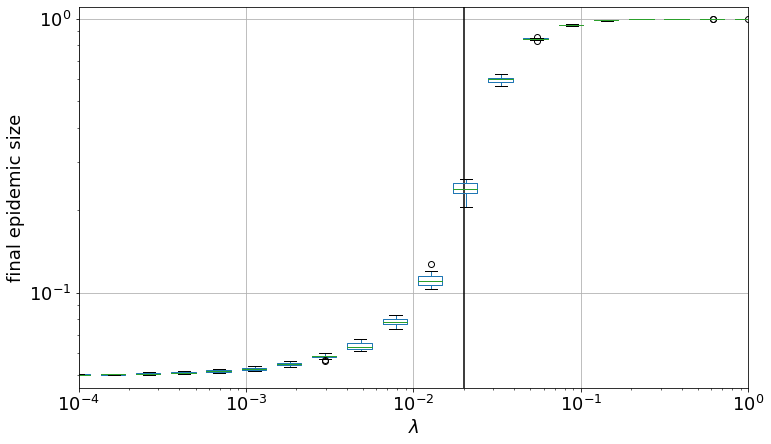

In [19]:
plt.figure(figsize=(12,7))

homo_net_size.boxplot(positions=np.array(homo_net_size.columns), 
                      widths=np.array(homo_net_size.columns)/3)

plt.vlines(x=lc, ymin=0.045, ymax=1.1)

plt.xscale('log')
plt.yscale('log')
plt.xlim(0.0001, 1.0)
plt.ylim(0.045, 1.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('final epidemic size', fontsize=18)
plt.xlabel('$\lambda$', fontsize=18)

# Barabàsi-Albert model network

In [20]:
N=10000
AB=nx.barabasi_albert_graph(N, 5)

In [21]:
nx.is_connected(AB)

True

In [22]:
print(nx.info(AB))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 49975
Average degree:   9.9950


In [23]:
sum_k2=0
for i in AB.nodes():
    k=AB.degree(i)
    sum_k2+=k*k
avg_k2=sum_k2/N
print(avg_k2)    

260.059


In [24]:
avg_deg=2*len(AB.edges)/N
print(avg_deg)

9.995


# The threshold can be approximated as $\lambda_c \sim \mu \frac{\langle k \rangle}{\langle k^2 \rangle - \langle k \rangle}$ 

In [25]:
lambda_c=mu*avg_deg/(avg_k2-avg_deg)
print(lambda_c)

0.007993953547891739


In [26]:
lc/lambda_c

2.504445479862196

## Simulations of an SIR process
We simulate 100 realizations of a SIR model for increasing values of $\lambda$

In [27]:
final_size_AB=defaultdict(list)

for lambd in np.geomspace(0.0001, 1.0, 20):
    for r in range(0, 20):
        
        t, S, I, R = EoN.fast_SIR(AB, lambd, mu, rho=0.05)
        
        final_size_AB[lambd].append(R[-1]/N)

In [28]:
sf_net_size=pd.DataFrame.from_dict(final_size_AB)

In [29]:
sf_net_size.tail()

,0.000100,0.000162,0.000264,0.000428,0.000695,0.001129,0.001833,0.002976,0.004833,0.007848,0.012743,0.020691,0.033598,0.054556,0.088587,0.143845,0.233572,0.379269,0.615848,1.000000
15,0.0500,0.0504,0.0505,0.0507,0.0514,0.0528,0.0577,0.0604,0.0737,0.1022,0.1763,0.3674,0.5766,0.7929,0.9050,0.9676,0.9930,0.9989,0.9999,1.0000
16,0.0500,0.0503,0.0503,0.0506,0.0518,0.0531,0.0563,0.0589,0.0751,0.1079,0.1789,0.3627,0.5739,0.7877,0.9106,0.9672,0.9907,0.9984,0.9995,0.9999
17,0.0504,0.0501,0.0505,0.0509,0.0531,0.0528,0.0565,0.0591,0.0760,0.1137,0.1795,0.3713,0.5893,0.7965,0.9075,0.9684,0.9912,0.9978,0.9998,1.0000
18,0.0501,0.0502,0.0506,0.0515,0.0525,0.0532,0.0556,0.0583,0.0750,0.0898,0.1701,0.3518,0.5623,0.7889,0.9066,0.9699,0.9921,0.9981,0.9999,1.0000
19,0.0502,0.0505,0.0501,0.0514,0.0512,0.0524,0.0562,0.0622,0.0693,0.0984,0.1556,0.3317,0.5734,0.7814,0.9104,0.9657,0.9911,0.9979,0.9998,0.9999


Text(0.5, 0, '$\\lambda$')

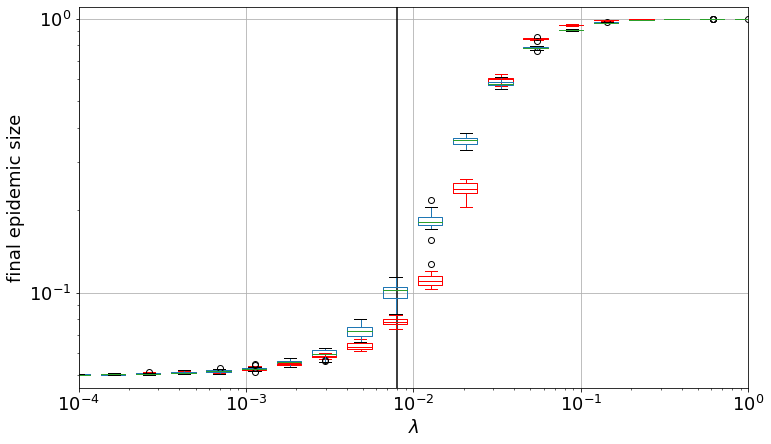

In [32]:
plt.figure(figsize=(12,7))

homo_net_size.boxplot(positions=np.array(homo_net_size.columns), widths=np.array(homo_net_size.columns)/3, color='r' )

plt.vlines(x=lambda_c, ymin=0.04, ymax=1.1)
sf_net_size.boxplot(positions=np.array(sf_net_size.columns), widths=np.array(sf_net_size.columns)/3)

plt.yscale('log')
plt.xscale('log')
plt.xlim(0.0001, 1.0)
plt.ylim(0.045, 1.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('final epidemic size', fontsize=18)
plt.xlabel('$\lambda$', fontsize=18)

# Configuration model network

We can use the configuration model to generate a network with a given power-law degree distribution. By setting $\gamma=2.1$, we expect to see more fluctuations in the degree distribution.

We create a function that samples from a power-law distribution between $k_{min}$ and $k_{max}$ with exponent $\gamma$

In [34]:
def get_activity(x0,x1,g):
    
    y=random.uniform(0,1)
    
    e=g+1.
    
    a=((x1**e-x0**e)*y+x0**e)**(1./e)
    
    return a

In [35]:
N=10000
kmin=2
kmax=N-1
a=[]
for i in range(N):
    act=get_activity(kmin,kmax,-2.1)
    
    a.append(int(round(act)))

#we need the sum of the degree sequence to be even to properly run the configuration model
if sum(a)%2==0:
    G1=nx.configuration_model(a)
else:
    a[-1]+=1
    G1=nx.configuration_model(a)

In [36]:
nx.is_connected(G1)

True

In [37]:
print(nx.info(G1))

Name: 
Type: MultiGraph
Number of nodes: 10000
Number of edges: 62981
Average degree:  12.5962


In [38]:
G1=nx.Graph(G1)

In [39]:
G1.remove_edges_from(nx.selfloop_edges(G1))

In [40]:
print(nx.info(G1))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 51323
Average degree:  10.2646


In [41]:
nx.is_connected(G1)

True

In [42]:
sum_k2=0
for i in G1.nodes():
    k=G1.degree(i)
    sum_k2+=k*k
avg_k2=sum_k2/N
print(avg_k2)

2577.3854


In [43]:
avg_deg=2*len(G1.edges)/N
print(avg_deg)

10.2646


In [44]:
lambda_c1=mu*avg_deg/(avg_k2-avg_deg)
print(lambda_c1)

0.0007996974665157946


In [45]:
lc/lambda_c1

25.034993441298358

## Simulations of an SIR process
We simulate 100 realizations of a SIR model for increasing values of $\lambda$

In [46]:
final_size_conf=defaultdict(list)

for lambd in np.geomspace(0.0001, 1.0, 20):
    for r in range(0, 20):
        
        t, S, I, R = EoN.fast_SIR(G1, lambd, mu, rho=0.05)
        
        final_size_conf[lambd].append(R[-1]/N)

In [47]:
conf_net_size=pd.DataFrame.from_dict(final_size_conf)

Text(0.5, 0, '$\\lambda$')

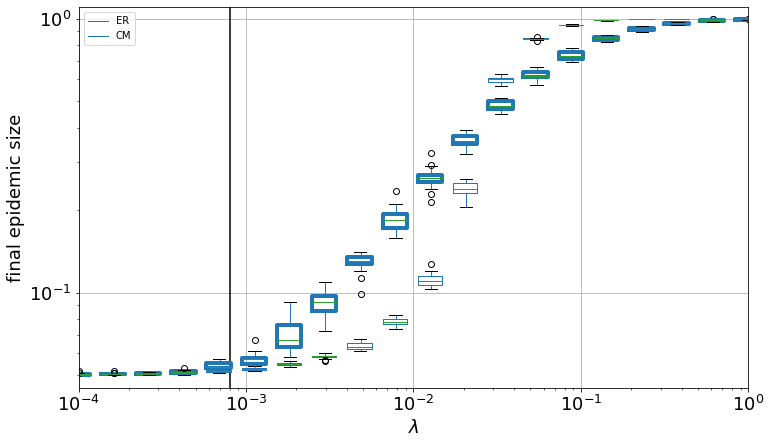

In [48]:
plt.figure(figsize=(12,7))

boxprops1 = dict(linestyle='-', linewidth=4, color='b')

homo_net_size.boxplot(positions=np.array(homo_net_size.columns), widths=np.array(homo_net_size.columns)/3)

conf_net_size.boxplot(positions=np.array(conf_net_size.columns), widths=np.array(conf_net_size.columns)/3, boxprops=boxprops1)

plt.vlines(x=lambda_c1, ymin=0.04, ymax=1.1)
plt.legend(['ER','CM'])
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.0001, 1.0)
plt.ylim(0.045, 1.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('final epidemic size', fontsize=18)
plt.xlabel('$\lambda$', fontsize=18)